# Nonlinear elliptic equation 

Solving
u''(x) + 1 / u(x)^3 = 0
with boundary conditions u'(0) = 0, u(1) = 1 using second-order finite-difference approximation and fixed point iteration (using a staggered grid)

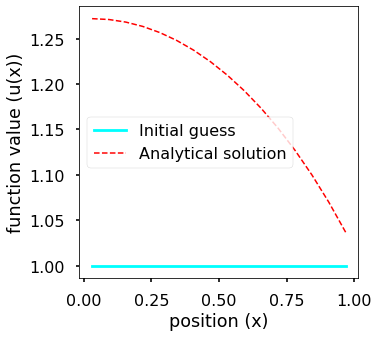

Residuum < 0.000001
Number of iterations:22


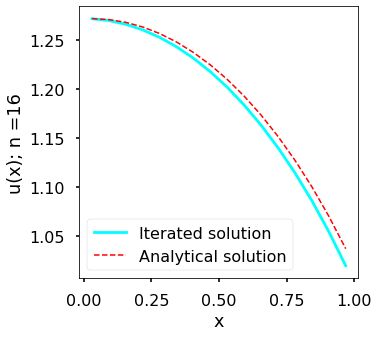

Residuum < 0.000001
Number of iterations:22


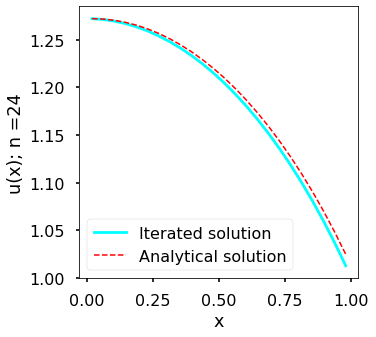

Residuum < 0.000001
Number of iterations:22


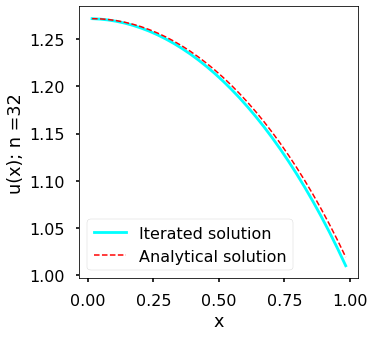

Residuum < 0.000001
Number of iterations:22


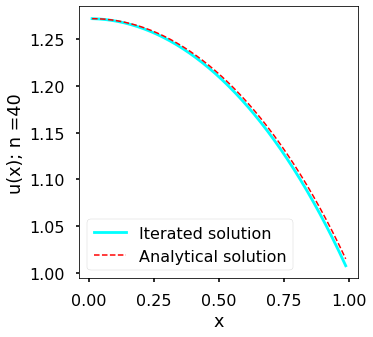

Residuum < 0.000001
Number of iterations:22


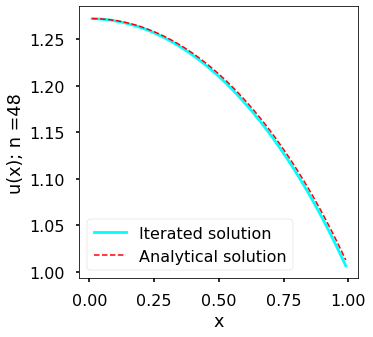

Residuum < 0.000001
Number of iterations:22


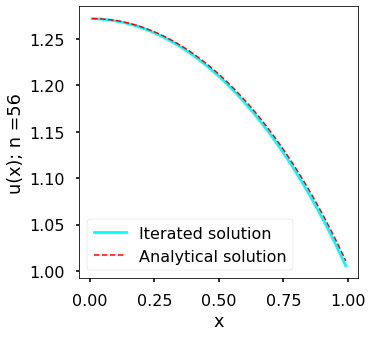

Residuum < 0.000001
Number of iterations:22


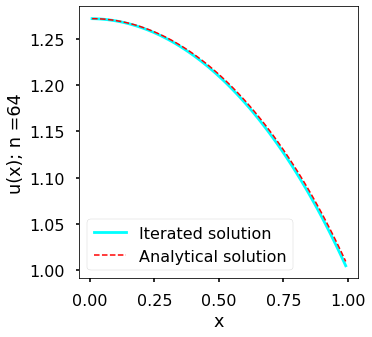

Residuum < 0.000001
Number of iterations:22


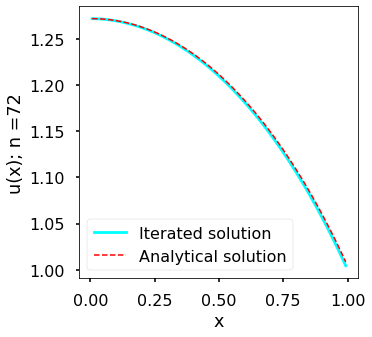

[0.0023772674798859844, 0.0013190426467945522, 0.0008647776932465605, 0.0006221858783048302, 0.00047500873711069834, 0.0003778899423784746, 0.00030986280451031665, 0.00026003921393402967]


In [2]:
import numpy as np
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

e = []
#maximal number of iterations z
z = 100

#to get convergence order repeat with more points on grid
for o in range(1,9):

    #number of gridpoints n
    n = 8*o + 8
    h = 1/(n)

    # Get A
    A = np.zeros((n, n))
    A[0, 0] = -1
    A[0, 1] = 1
    A[n-1, n-1] = -3
    A[n-1, n-2] = 1
    for i in range(1, n-1):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1

    A = 1/h**2*A

    #initial guess u1 and analytical solution sol for plot
    u1 = np.zeros(n)
    sol = np.zeros(n)
    b1 = -0.763932
    b2 = 1.11179

    for i in range(0, n):
        u1[i] = 1
        sol[i] = ((b1)*(i*h)**2 + 2)**(1/2)/(b2)
        
    # Get f and grid x
    f = np.zeros(n)
    x = np.zeros(n)
    for j in range(0, n-1):
        x[j] = (j + 1/2)*h
        f[j] = - 1/u1[j]**3
    f[n-1] = -2/h**2 - 1/u1[n-1]**3
    x[n-1] = (n-1+1/2)*h

    # y needed for plot
    y = np.linspace(0+h/2, 1-h/2, n)
    
    #Plot initial guess and analytical solution
    if o == 1:
        plt.figure(figsize=(5,5))
        plt.plot(y, u1, label = "Initial guess", color = "cyan")
        plt.plot(y, sol, label = "Analytical solution", color = "red", linewidth = "1.5", linestyle = "dashed")
        plt.xlabel('position (x)')
        plt.ylabel('function value (u(x))')
        plt.legend()
        plt.show()
    
    # first iteration:
    u1 = np.linalg.solve(A, f)
    res = +1/u1**3 + A.dot(u1)

    #loop for next iterations:
    for i in range(0,z-1):
        # condition to end after certain value for the Residuum is achieved
        if all(abs(res) < 0.000001):
            print('Residuum < 0.000001')
            print('Number of iterations:' + str(i+1))
            #print(res)
            break
        if any(u1 == 0):
            print('Division by 0 encountered')
            break
        for j in range(0, n):
            #get updated f
            f[j] = - 1/u1[j]**3
        #f[n-1] has different formula:
        f[n-1] = -2/h**2 - 1/u1[n-1]**3
        u1 = 1*np.linalg.solve(A, f) + 0*u1
        #needed for stopping condition
        res = +1/u1**3 + A.dot(u1)
        res[-1] = 0
    
    #calculate total error over whole grid by subtracting from analytical solution
    e.append(np.linalg.norm(sol - u1)*1/n)

    #plot iterated solution
    plt.figure(figsize=(5,5))
    plt.plot(y, u1, label = "Iterated solution", color = "cyan")
    plt.plot(y, sol, label = "Analytical solution", color = "red", linestyle = 'dashed', linewidth = '1.5')
    plt.xlabel('x')
    plt.ylabel('u(x)' + "; n =" + str(n))
    plt.legend()
    plt.show()

#print errors for different gridsizes
print(e)

-1.4723378191069796 -2.819272849072091


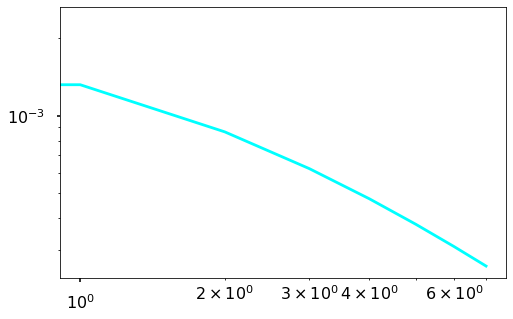

In [3]:
from scipy.optimize import curve_fit

#linear fit to find convergence order
y1 = np.array([16, 24, 32, 40, 48, 56, 64, 72])

def fit_func(x1, a, b):
    return a*x1 + b

params = curve_fit(fit_func,np.log2(y1), np.log2(e))

[a,b] = params[0]
print(a,b)

plt.figure(figsize=(8,5))
plt.plot(e, color = "cyan")
plt.yscale('log')
plt.xscale('log')
plt.show()
